Estudiante Arlex Fabian Galindez Rivera

In [81]:
import numpy as np
from sklearn.datasets import fetch_olivetti_faces
from sklearn.decomposition import FastICA
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import matplotlib.pyplot as plt
from skimage.transform import resize
from skimage import color
from sklearn.svm import SVC
from skimage.io import imread
from skimage.color import rgb2gray

In [23]:
faces = fetch_olivetti_faces()

images = faces.images

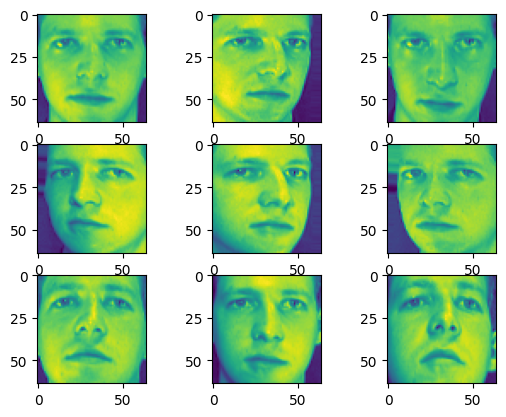

In [25]:
fig = plt.figure()
for i in range(9): # display 20 images
    # subplot : 4 rows and 5 columns
    img_grid = fig.add_subplot(3, 3, i+1)
    # plot features as image
    img_grid.imshow(images[i])

plt.show()

In [26]:
print("Clases de imágenes:", np.unique(faces.target))

Clases de imágenes: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39]


In [27]:
print("Dimensiones originales: ", images[9].shape)
images = [resize(image, (64, 64)) for image in images]
print("Dimensiones ahustadas: ", images[1].shape, images[3].shape)

Dimensiones originales:  (64, 64)
Dimensiones ahustadas:  (64, 64) (64, 64)


In [28]:
images = np.array([color.gray2rgb(image) for image in images])

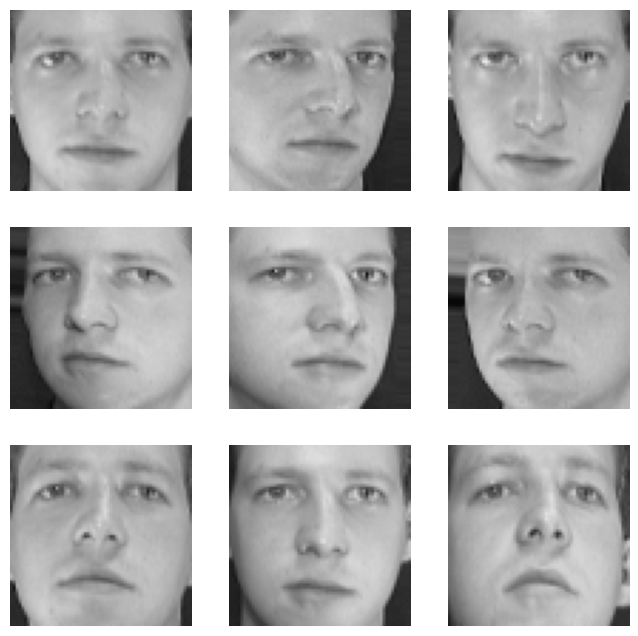

In [29]:
fig, axes = plt.subplots(3, 3, figsize=(8, 8))
for i, ax in enumerate(axes.flat):
    ax.imshow(images[i], cmap='gray')
    ax.axis('off')
plt.show()

In [55]:
n_components = [10, 20, 30]  # Prueba con diferentes números de componentes
icas = []
for n in n_components:
    ica = FastICA(n_components=n)
    ica.fit(faces.images.reshape((-1, 64 * 64)))
    icas.append(ica)

/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_fastica.py:542: FutureWarning: Starting in v1.3, whiten='unit-variance' will be used by default.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_fastica.py:542: FutureWarning: Starting in v1.3, whiten='unit-variance' will be used by default.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_fastica.py:542: FutureWarning: Starting in v1.3, whiten='unit-variance' will be used by default.
  warnings.warn(


In [72]:
X_train_val, X_test, y_train_val, y_test = train_test_split(
    faces.images.reshape((-1, 64 * 64)), faces.target, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(
    X_train_val, y_train_val, test_size=0.25, random_state=42)  # 0.25 * 0.8 = 0.2

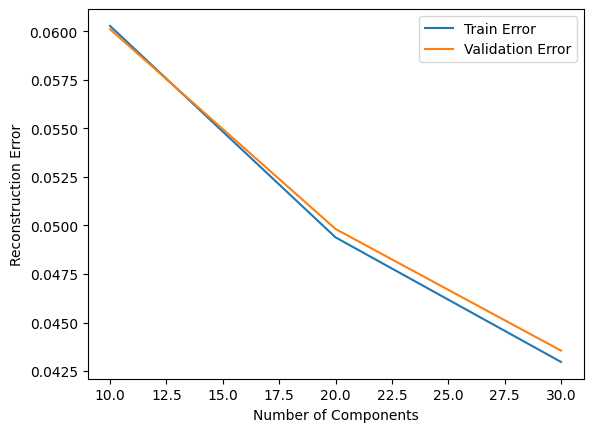

In [73]:
train_errors = []
val_errors = []
for ica in icas:
    X_train_transformed = ica.transform(X_train)
    X_train_reconstructed = ica.inverse_transform(X_train_transformed)
    train_error = np.mean(np.abs(X_train_reconstructed - X_train))
    train_errors.append(train_error)

    X_val_transformed = ica.transform(X_val)
    X_val_reconstructed = ica.inverse_transform(X_val_transformed)
    val_error = np.mean(np.abs(X_val_reconstructed - X_val))
    val_errors.append(val_error)

plt.plot(n_components, train_errors, label='Train Error')
plt.plot(n_components, val_errors, label='Validation Error')
plt.xlabel('Number of Components')
plt.ylabel('Reconstruction Error')
plt.legend()
plt.show()

In [74]:
best_ica = icas[np.argmin(val_errors)]  # Obtener el modelo con el menor error de validación
X_train_transformed = best_ica.transform(X_train)
X_test_transformed = best_ica.transform(X_test)

# Utilizar un clasificador, como SVM, para realizar las predicciones
svm = SVC()
svm.fit(X_train_transformed, y_train)
y_test_pred = svm.predict(X_test_transformed)

print("Matriz de Confusión:")
print(confusion_matrix(y_test, y_test_pred))
print("\nReporte de Clasificación:")
print(classification_report(y_test, y_test_pred))

Matriz de Confusión:
[[3 0 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 [0 0 1 ... 0 0 0]
 ...
 [0 0 0 ... 2 0 0]
 [0 0 0 ... 0 4 0]
 [0 0 2 ... 0 0 1]]

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.75      1.00      0.86         3
           1       1.00      1.00      1.00         1
           2       0.33      0.50      0.40         2
           3       1.00      0.75      0.86         4
           4       1.00      0.33      0.50         3
           5       1.00      1.00      1.00         3
           7       1.00      0.83      0.91         6
           8       1.00      1.00      1.00         2
           9       0.67      1.00      0.80         2
          10       1.00      1.00      1.00         2
          11       1.00      1.00      1.00         3
          12       1.00      1.00      1.00         2
          13       1.00      1.00      1.00         1
          14       1.00      1.00      1.00         3
          15       1.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.

In [90]:
integrante1 = resize(imread("/content/Screenshot_20230217_092205.png"), (64, 64))
integrante1_gray = color.rgb2gray(integrante1)
integrante1_flat = integrante1_gray.reshape(1, -1)


integrante1_transformed = best_ica.transform(integrante1_flat)

integrante1_pred = svm.predict(integrante1_transformed)

print("Precisión para el integrante 1:", integrante1_pred[0], "%")

Precisión para el integrante 1: 35 %
